In [1]:
import numpy as np
import pandas as pd

/home/harsh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harsh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
column_names = ['user_id','item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_title = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_title,on='item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [10]:
%matplotlib inline

In [11]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [12]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [14]:
ratings['No of ratings'] = df.groupby('title')['rating'].count()

In [15]:
ratings.head()

,rating,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


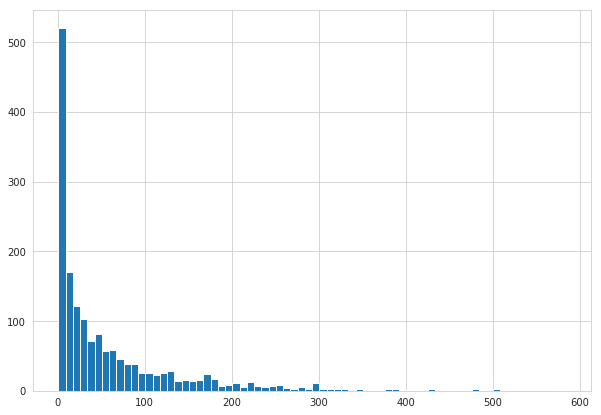

In [16]:
plt.figure(figsize=(10,7))
ratings['No of ratings'].hist(bins=70)

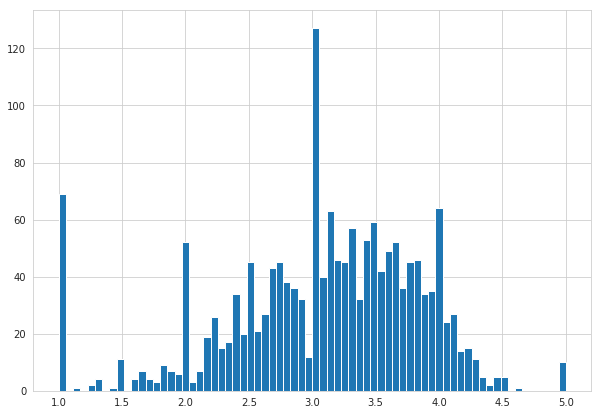

In [17]:
plt.figure(figsize=(10,7))
ratings['rating'].hist(bins=70)

/home/harsh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


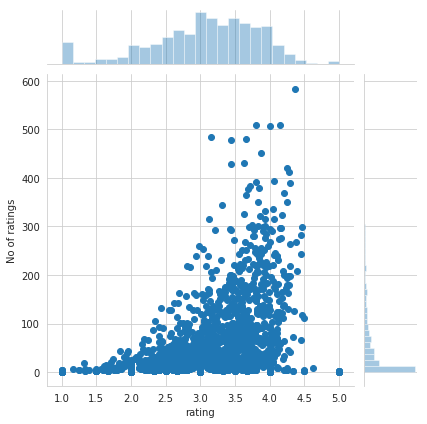

In [18]:
sns.jointplot(x='rating',y='No of ratings',data=ratings)

In [19]:
movie_mat = df.pivot_table(index='user_id',columns='title',values='rating')

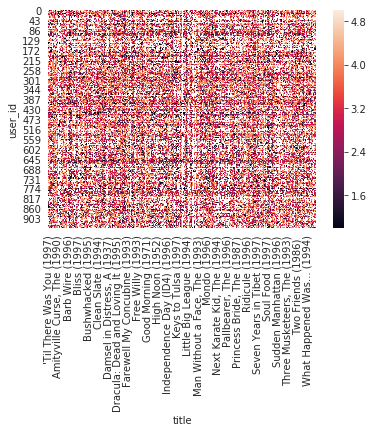

In [20]:
sns.heatmap(movie_mat)

In [21]:
starwars_movie_ratings = movie_mat['Star Wars (1977)']

In [22]:
liarliar_movie_ratings = movie_mat['Liar Liar (1997)']

In [23]:
starwars_movie_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [29]:
similar_to_starwars = movie_mat.corrwith(starwars_movie_ratings)

/home/harsh/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/harsh/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [30]:
similar_to_liarliar = movie_mat.corrwith(liarliar_movie_ratings) 

/home/harsh/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/harsh/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [39]:
corr_starwars.sort_values(by='Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


### Many movies are correlated completely with star wars because they are rated 5 by a very small people.
### SO we need to put a threshold on min number of ratings

In [40]:
corr_starwars = corr_starwars.join(ratings['No of ratings'])

In [41]:
corr_starwars.head()

,Correlation,No of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [44]:
corr_starwars[corr_starwars['No of ratings'] > 100].sort_values('Correlation',ascending=False).head()

,Correlation,No of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [55]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['No of ratings'])

In [56]:
corr_liarliar[corr_liarliar['No of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,No of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
